# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from inspect import getmembers, isfunction
import data_preparation
from data_preparation import *
from testing_models import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score
from scipy.optimize import minimize
from scipy.optimize import fsolve

data_preparation.set_plot_styling()

# Data Preparation

**Disclaimer: The code is too large to put it into one notebook. To see the process of data preparation see `data_preparation.py`. You can uncomment the code if recalculation needed. Here is the appriximate description of data preparation process:**

1. **Import Libraries**
   - Import necessary libraries, including:
     - `pandas` for data manipulation
     - `numpy` for numerical operations
     - `sklearn` for machine learning algorithms
     - `scorecardpy` for Weight of Evidence calculations

2. **Load Datasets**
   - Load the dataset from a specified path using `pandas.read_csv`.

3. **Data Cleaning**
   - Convert columns to appropriate data types.
   - Identify and classify missing values into continuous and categorical types.

4. **Handle Missing Values**
   - **Continuous Features**:
     - Predict and replace missing values using regression algorithms.
   - **Categorical Features**:
     - Predict and replace missing values using classification algorithms.
     - If classification models fail, replace missing values with the mode of the categorical variable.

5. **Standardization**
   - Apply standardization to the features to ensure they have a mean of zero and a unit variance.

6. **Feature Engineering**
   - Use timestamp data format for relevant features, avoiding extraction of day, month, and year.

7. **Encoding Categorical Variables**
   - Convert categorical variables into numerical format using one-hot encoding.

8. **Generate Datasets**
   - Create three datasets:
     - **`X`**: Modified dataset based on the above steps.
     - **`X_woe_manual`**: Uses a custom-developed algorithm to calculate Weight of Evidence (WoE) and filters columns by information value.
     - **`X_woe_automatic`**: Uses the `scorecardpy` library to estimate WoE values.

9. **Splitting Data**
   - Optionally, split the dataset into training and testing sets based on a defined ratio.

10. **Output Processed Data**
    - Save the cleaned and transformed datasets (`X`, `X_woe_manual`, `X_woe_automatic`) into new CSV files for further analysis.

In [6]:
# print(*getmembers(data_preparation, isfunction), sep='\n')

To-estimate-data standardization complete.
To-predict-data standardization complete.
Processing column 'emp_length' for missing value imputation...
Best regression model for 'emp_length': CatBoost
Processing column 'mths_since_recent_inq' for missing value imputation...
Best regression model for 'mths_since_recent_inq': CatBoost
Processing column 'num_accts_ever_120_pd' for missing value imputation...
Best regression model for 'num_accts_ever_120_pd': CatBoost
Processing column 'num_tl_90g_dpd_24m' for missing value imputation...
Best regression model for 'num_tl_90g_dpd_24m': CatBoost
Processing column 'acc_open_past_24mths' for missing value imputation...
Best regression model for 'acc_open_past_24mths': CatBoost
Processing column 'avg_cur_bal' for missing value imputation...
Best regression model for 'avg_cur_bal': CatBoost
Processing column 'tot_hi_cred_lim' for missing value imputation...
Best regression model for 'tot_hi_cred_lim': CatBoost
Processing column 'is_leadership' for m

No objects info loaded


Best regression model for 'emp_length': CatBoost
Processing column 'mths_since_recent_inq' in the prediction dataset for missing value imputation...
Best regression model for 'mths_since_recent_inq': CatBoost


No objects info loaded


Best regression model for 'mths_since_recent_inq': CatBoost
Processing column 'is_leadership' in the prediction dataset for missing value imputation...
All classification models performed poorly for 'is_leadership'. Filled missing values with mode.
All classification models performed poorly for 'is_leadership'. Filled missing values with mode.
Processing column 'healthcare' in the prediction dataset for missing value imputation...
All classification models performed poorly for 'healthcare'. Filled missing values with mode.
All classification models performed poorly for 'healthcare'. Filled missing values with mode.
Processing column 'education' in the prediction dataset for missing value imputation...
All classification models performed poorly for 'education'. Filled missing values with mode.
All classification models performed poorly for 'education'. Filled missing values with mode.
Processing column 'finance' in the prediction dataset for missing value imputation...
All classificatio

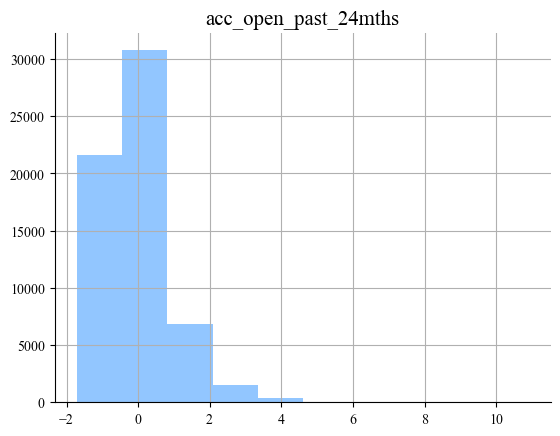

>>> Current breaks:
-0.6999999999999991,-0.2999999999999987,0.4000000000000019 



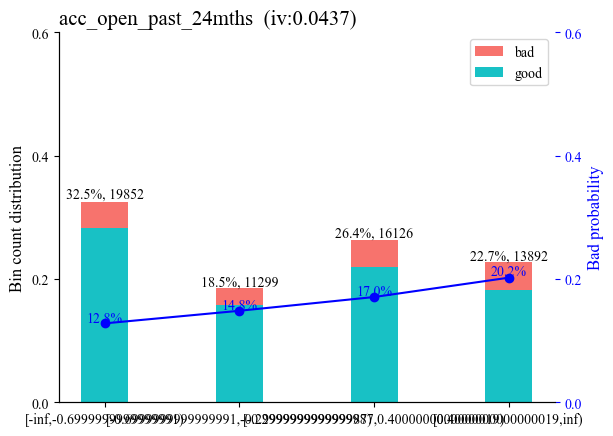

>>> Adjust breaks for (1/10) acc_open_past_24mths?
1: next 
2: yes 
3: back


Selection:  1


-------- 2/10 annual_inc --------
>>> dt[annual_inc].describe(): 
count    61169.000000
mean        -0.000137
std          1.000681
min         -1.333569
25%         -0.559937
50%         -0.206497
75%          0.308517
max         77.298014
Name: annual_inc, dtype: float64 



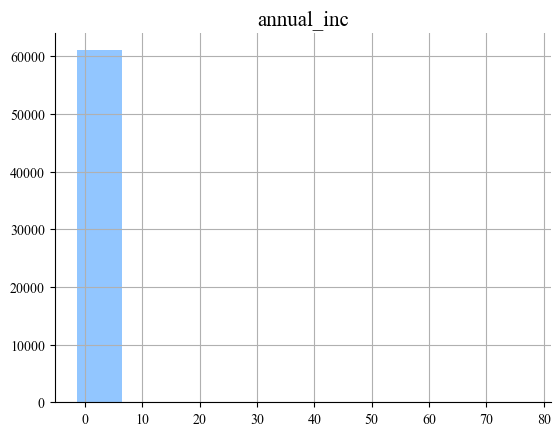

>>> Current breaks:
-0.8999999999999997,-0.19999999999999907,0.40000000000000147 



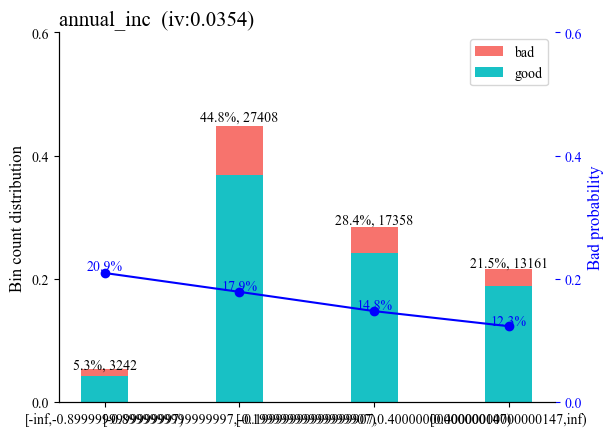

>>> Adjust breaks for (2/10) annual_inc?
1: next 
2: yes 
3: back


Selection:  1


-------- 3/10 avg_cur_bal --------
>>> dt[avg_cur_bal].describe(): 
count    61169.000000
mean         0.025754
std          0.904360
min         -0.855582
25%         -0.624013
50%         -0.116391
75%          0.304322
max         21.199601
Name: avg_cur_bal, dtype: float64 



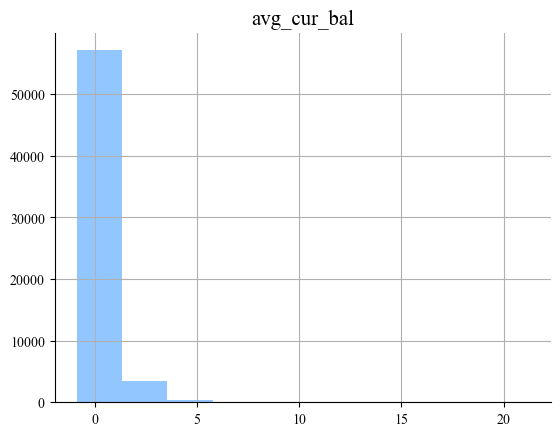

>>> Current breaks:
-0.30000000000000016,0.09999999999999976,0.5999999999999995,1.4999999999999996 



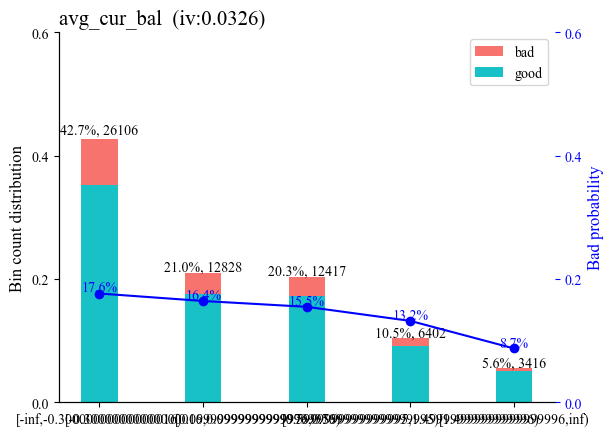

>>> Adjust breaks for (3/10) avg_cur_bal?
1: next 
2: yes 
3: back


Selection:  1


-------- 4/10 dti --------
>>> dt[dti].describe(): 
count    61169.000000
mean        -0.000015
std          1.000016
min         -2.228267
25%         -0.743899
50%         -0.037563
75%          0.719225
max          2.417353
Name: dti, dtype: float64 



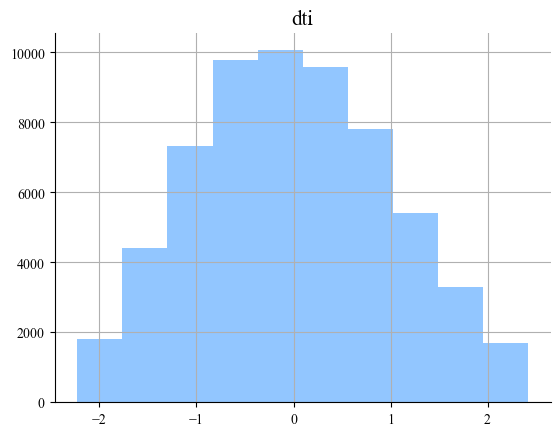

>>> Current breaks:
-1.0999999999999992,-0.2999999999999985,0.20000000000000195,1.2000000000000028 



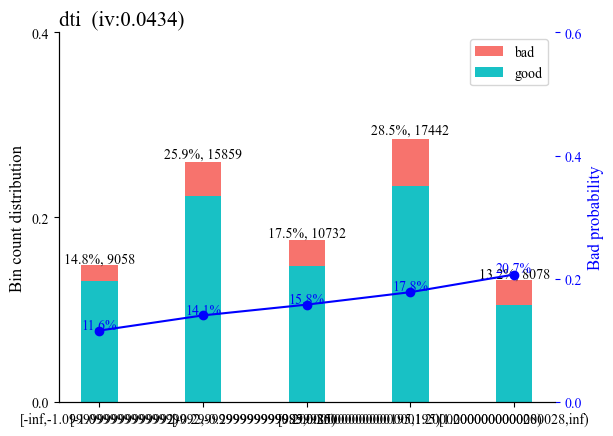

>>> Adjust breaks for (4/10) dti?
1: next 
2: yes 
3: back


Selection:  1


-------- 5/10 emp_length --------
>>> dt[emp_length].describe(): 
count    61169.000000
mean         0.009754
std          0.981293
min         -1.674894
25%         -0.840949
50%         -0.007004
75%          1.104922
max          1.344003
Name: emp_length, dtype: float64 



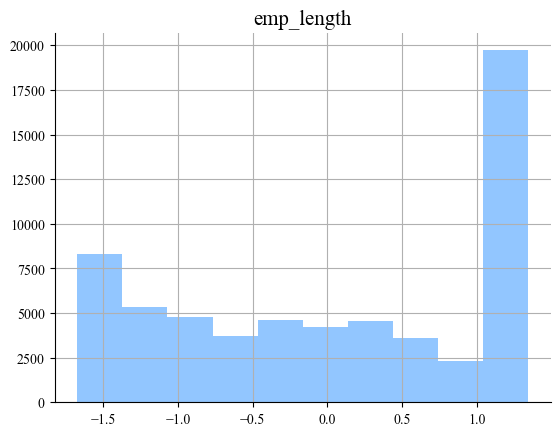

>>> Current breaks:
-1.3499999999999999,-0.5499999999999992,-0.04999999999999871,0.8500000000000023 



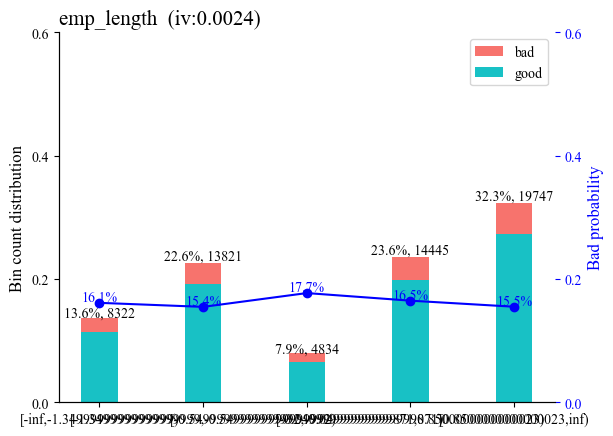

>>> Adjust breaks for (5/10) emp_length?
1: next 
2: yes 
3: back


Selection:  1


-------- 6/10 funded_amnt --------
>>> dt[funded_amnt].describe(): 
count    61169.000000
mean        -0.000068
std          1.000063
min         -1.608709
25%         -0.753027
50%         -0.264066
75%          0.713856
max          2.547460
Name: funded_amnt, dtype: float64 



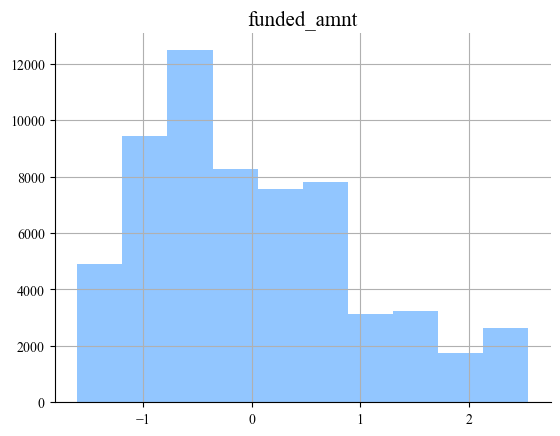

>>> Current breaks:
-0.6999999999999993,0.2000000000000015,1.7000000000000028 



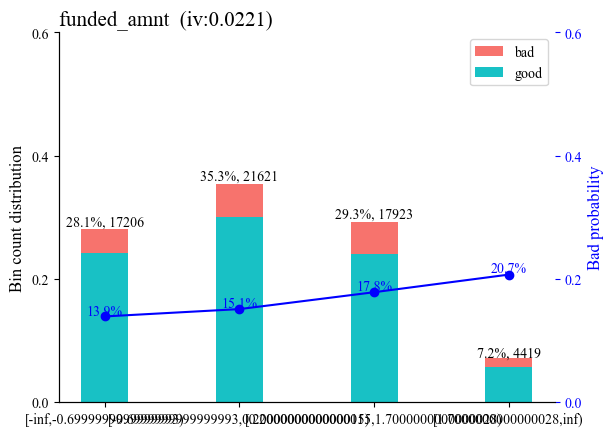

>>> Adjust breaks for (6/10) funded_amnt?
1: next 
2: yes 
3: back


Selection:  1


-------- 7/10 inq_last_6mths --------
>>> dt[inq_last_6mths].describe(): 
count    61169.000000
mean        -0.000155
std          0.999844
min         -0.775045
25%         -0.775045
50%         -0.775045
75%          0.157149
max          6.682503
Name: inq_last_6mths, dtype: float64 

>>> dt[inq_last_6mths].value_counts(): 
inq_last_6mths
-0.775045    30839
 0.157149    17097
 1.089342     8104
 2.021536     3670
 2.953729      961
 3.885923      335
 4.818116      137
 5.750309       17
 6.682503        9
Name: count, dtype: int64 

>>> Current breaks:
0.15714865563303426,1.0893421191847312,2.021535582736428 



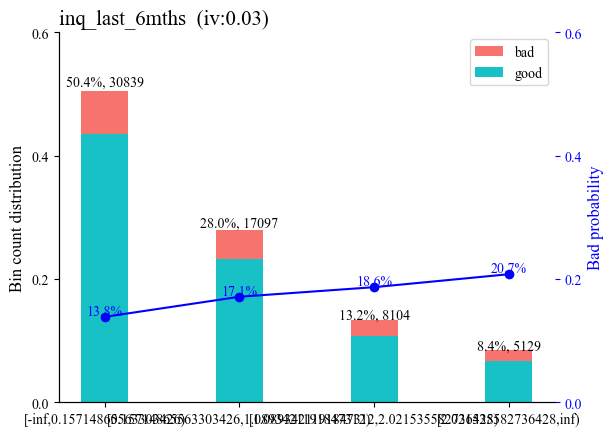

>>> Adjust breaks for (7/10) inq_last_6mths?
1: next 
2: yes 
3: back


Selection:  1


-------- 8/10 mths_since_recent_inq --------
>>> dt[mths_since_recent_inq].describe(): 
count    61169.000000
mean         0.105097
std          0.987191
min         -1.238093
25%         -0.784130
50%          0.006181
75%          0.907083
max          2.912429
Name: mths_since_recent_inq, dtype: float64 



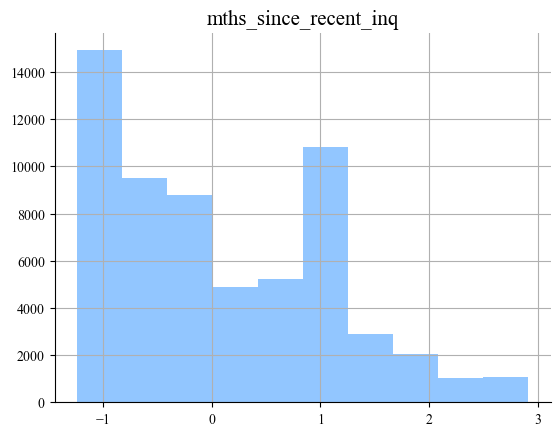

>>> Current breaks:
-0.9999999999999998,-0.49999999999999933,0.40000000000000147 



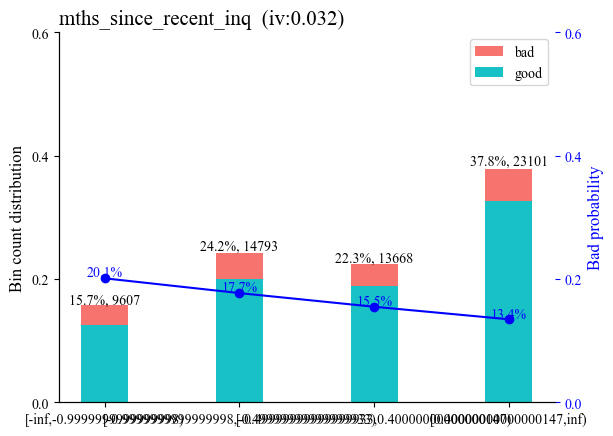

>>> Adjust breaks for (8/10) mths_since_recent_inq?
1: next 
2: yes 
3: back


Selection:  1


-------- 9/10 num_accts_ever_120_pd --------
>>> dt[num_accts_ever_120_pd].describe(): 
count    61169.000000
mean        -0.032840
std          0.901802
min         -0.625392
25%         -0.365921
50%         -0.365921
75%         -0.175905
max         26.835666
Name: num_accts_ever_120_pd, dtype: float64 



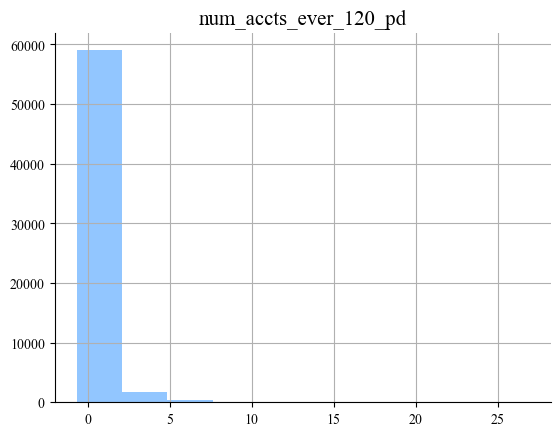

>>> Current breaks:
-0.35999999999999976,-0.21999999999999964,-0.07999999999999952 



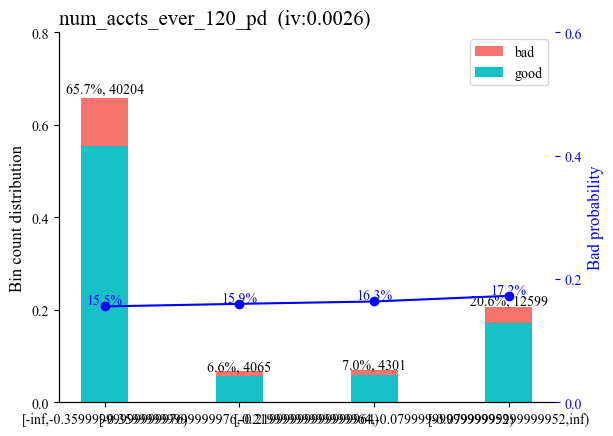

>>> Adjust breaks for (9/10) num_accts_ever_120_pd?
1: next 
2: yes 
3: back


Selection:  1


-------- 10/10 num_tl_90g_dpd_24m --------
>>> dt[num_tl_90g_dpd_24m].describe(): 
count    61169.000000
mean        -0.028038
std          0.903267
min         -0.422650
25%         -0.176900
50%         -0.176900
75%         -0.176900
max         45.759028
Name: num_tl_90g_dpd_24m, dtype: float64 



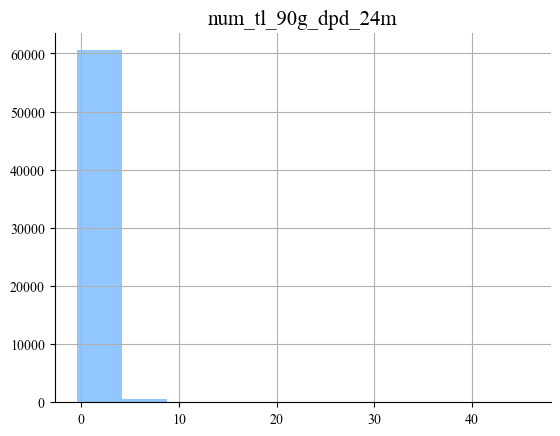

>>> Current breaks:
-0.1 



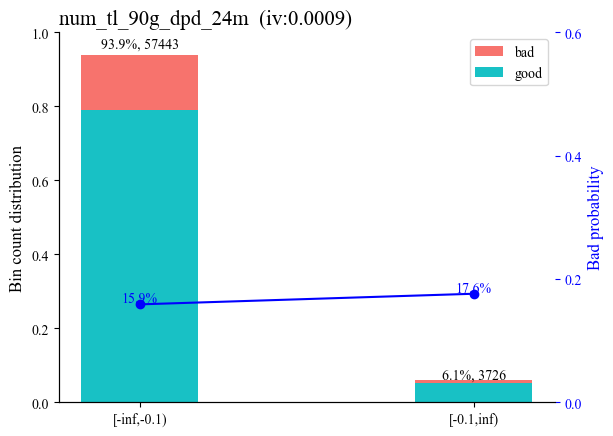

>>> Adjust breaks for (10/10) num_tl_90g_dpd_24m?
1: next 
2: yes 
3: back


Selection:  1


[INFO] creating woe binning ...
[INFO] converting into woe values ...


In [8]:
# y, X, X_woe_manual, X_woe_automatic, df_to_pred = data_preparation.main()

In [9]:
# y.to_csv('y.csv', index=False)
# X.to_csv('X.csv', index=False)
# X_woe_manual.to_csv('X_woe_manual.csv', index=False)
# X_woe_automatic.to_csv('X_woe_automatic.csv', index=False)
# df_to_pred.to_csv('df_to_pred.csv', index=False)

# Model quality evaluation

In [11]:
y = pd.read_csv('y.csv')['def']
X = pd.read_csv('X.csv')
X_woe_manual = pd.read_csv('X_woe_manual.csv')
X_woe_automatic = pd.read_csv('X_woe_automatic.csv')
df_to_pred = pd.read_csv('df_to_pred.csv')

In [12]:
# # Run the main experiment
# results_X, results_X_woe_manual, results_X_woe_automatic = main_experiment(y, X, X_woe_manual, X_woe_automatic)

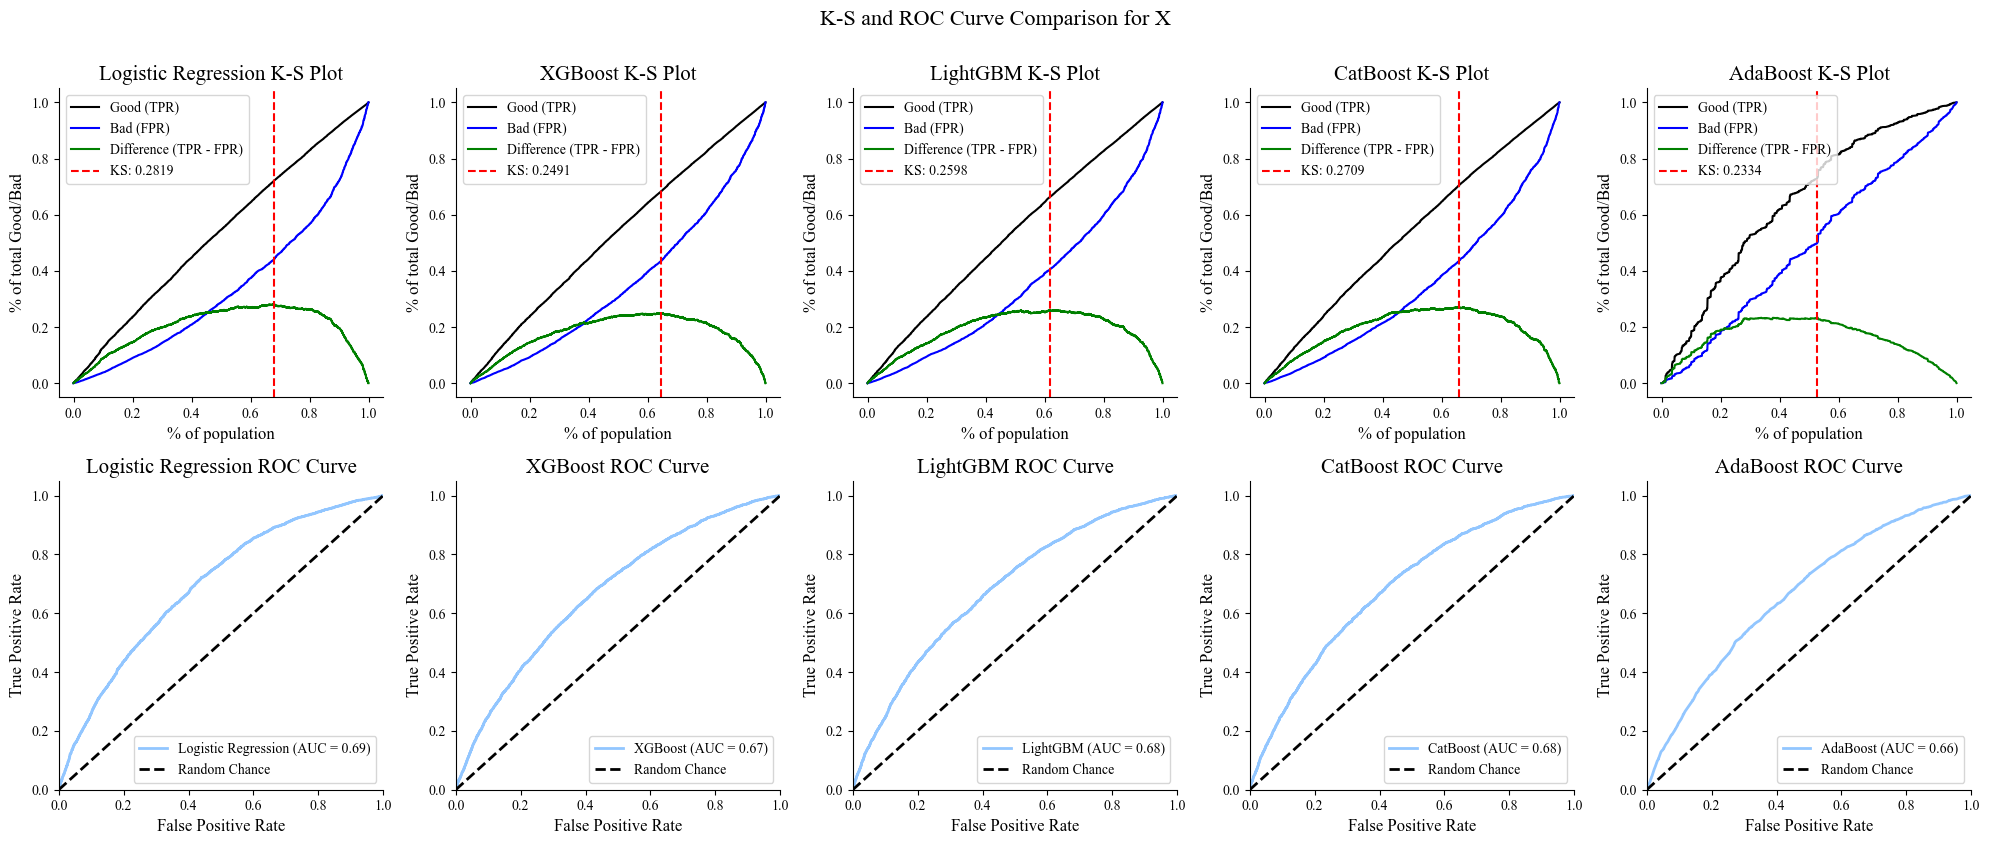

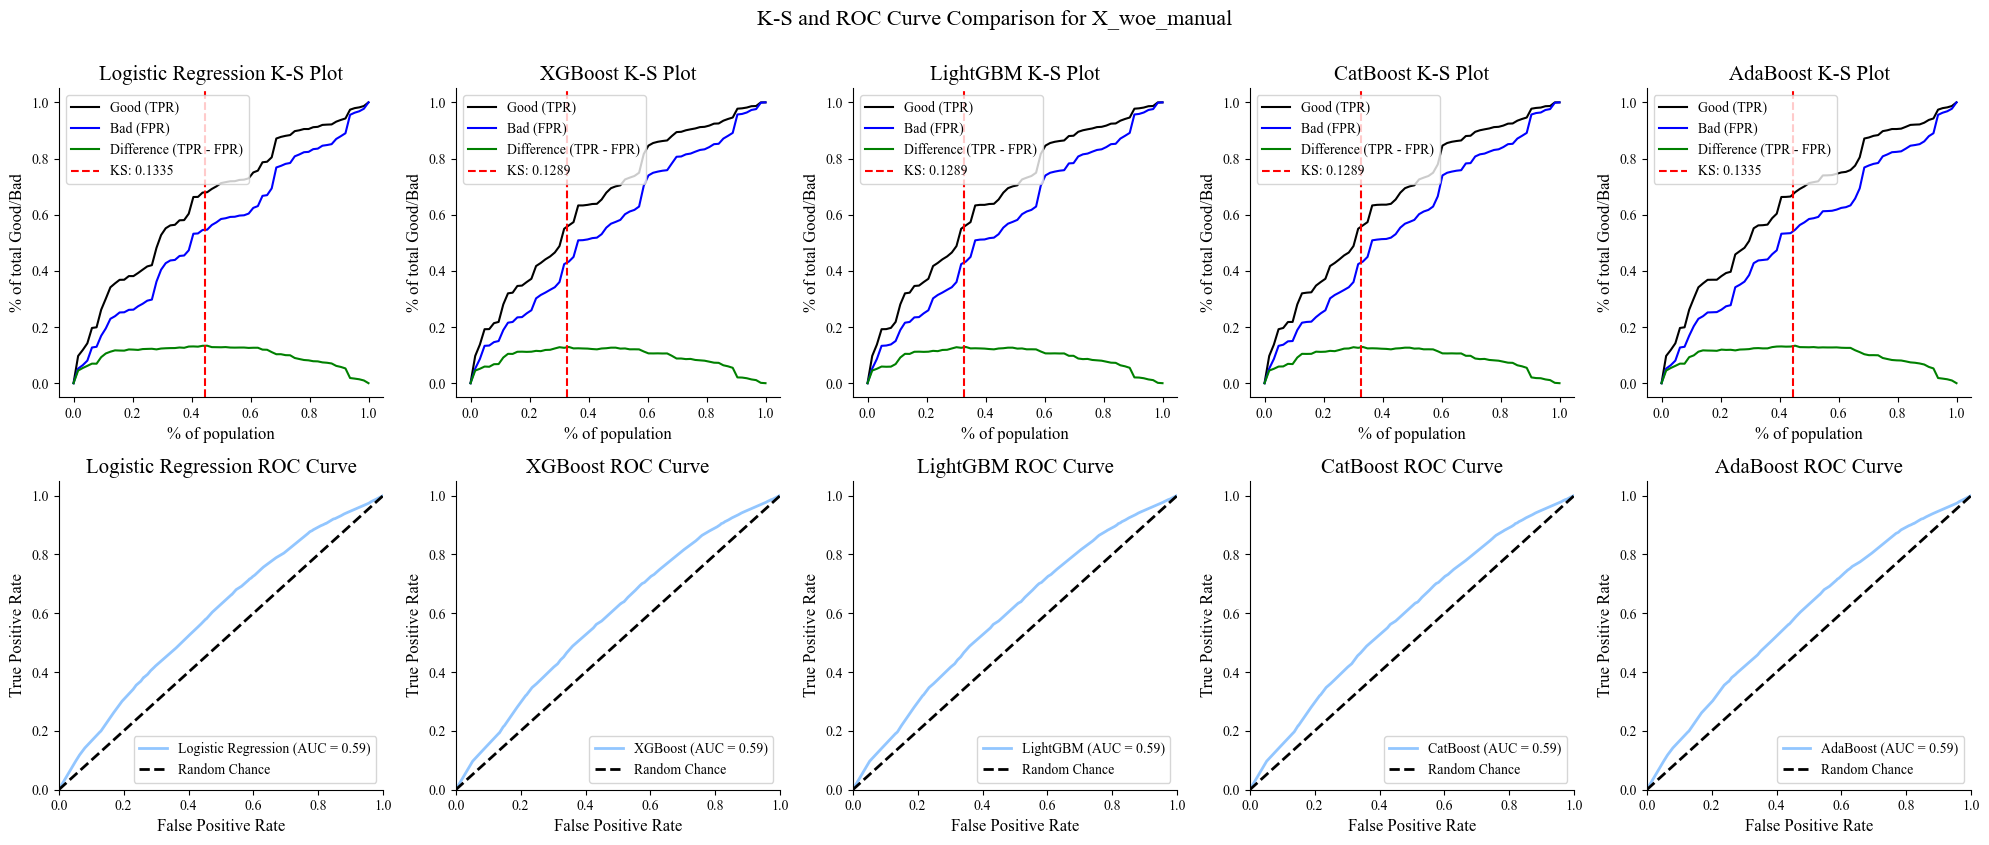

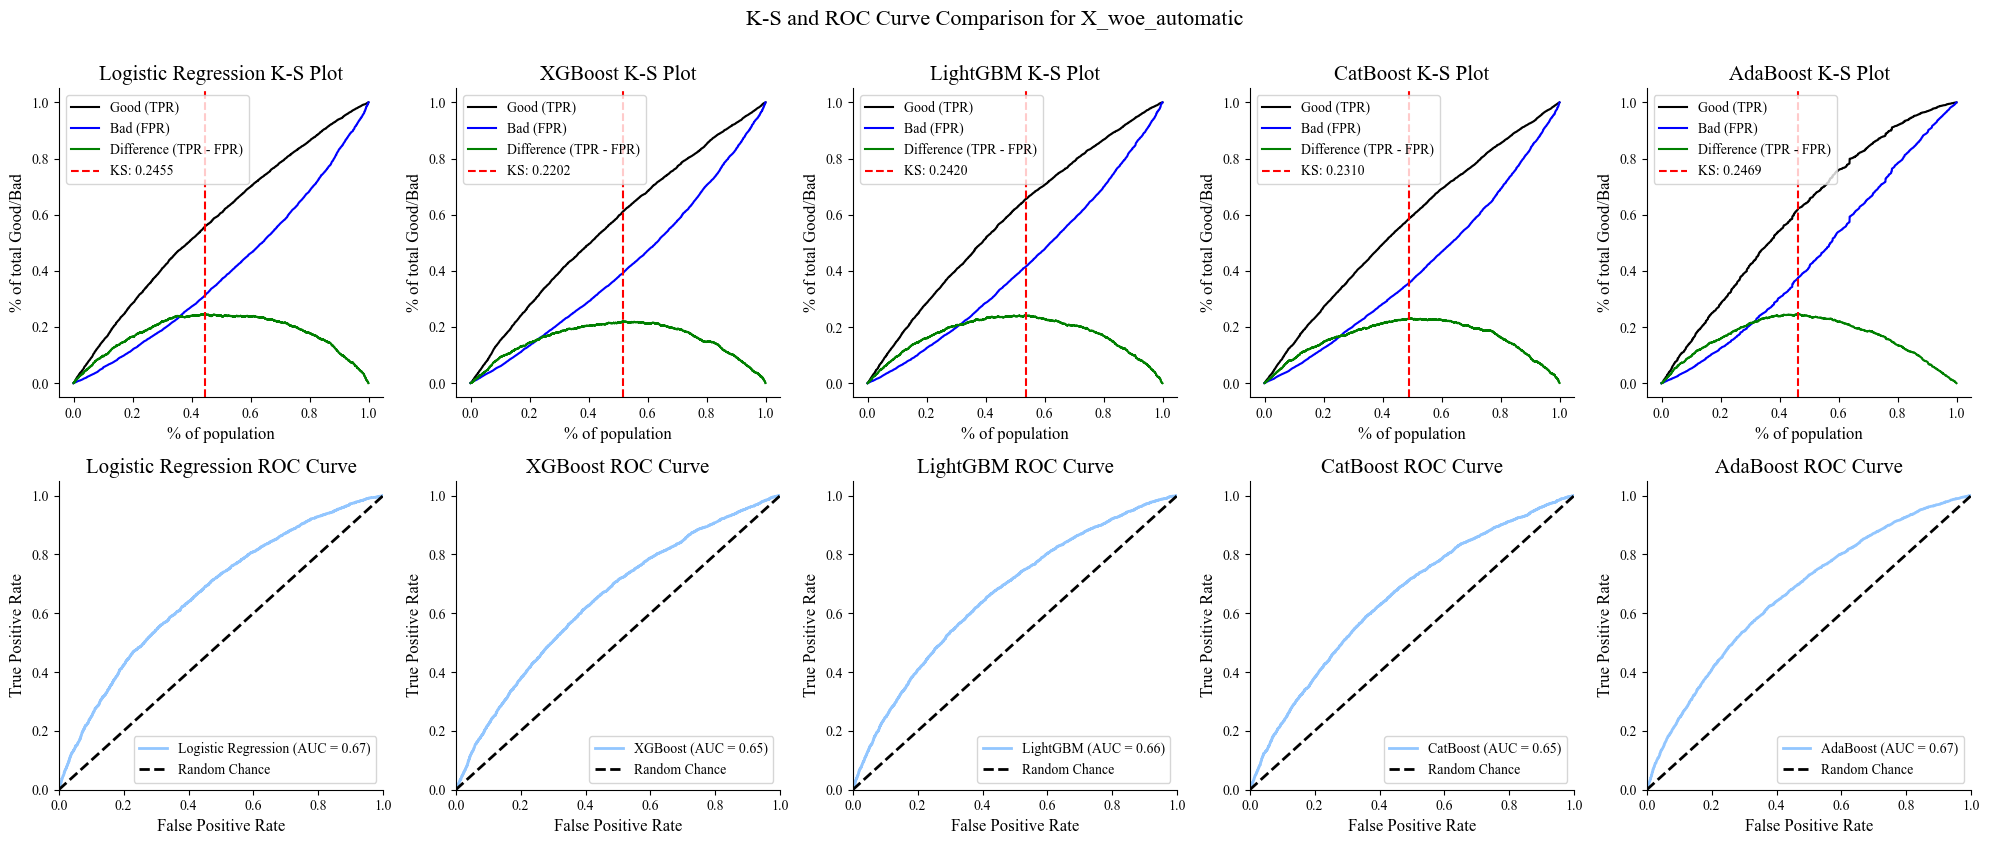

In [13]:
# Evaluate all datasets
evaluate_all_datasets(y, X, X_woe_manual, X_woe_automatic)

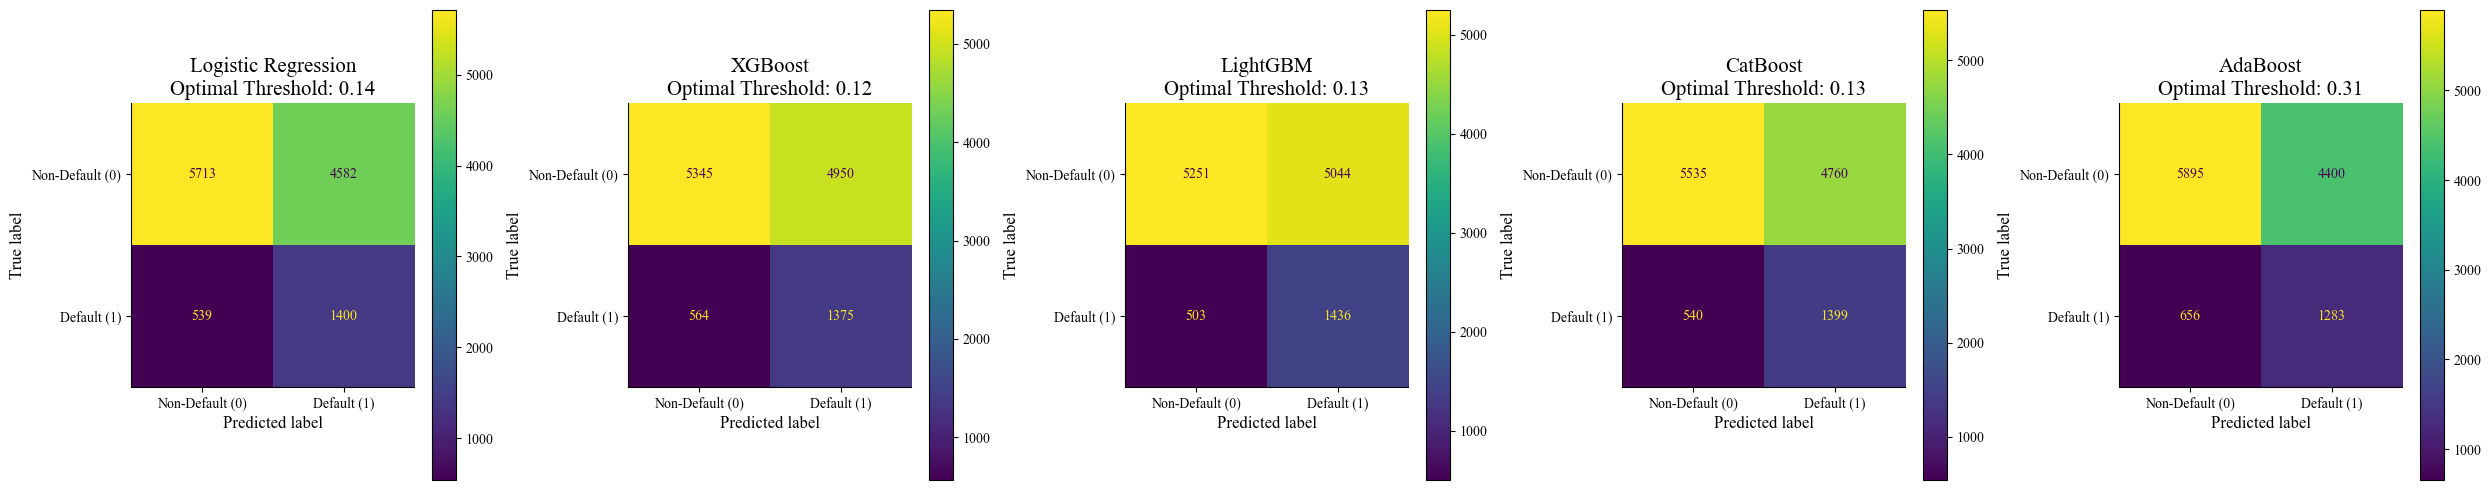

In [14]:
# Plotting confusion matrices for X
evaluate_models_and_plot_confusion_matrices(X, y)

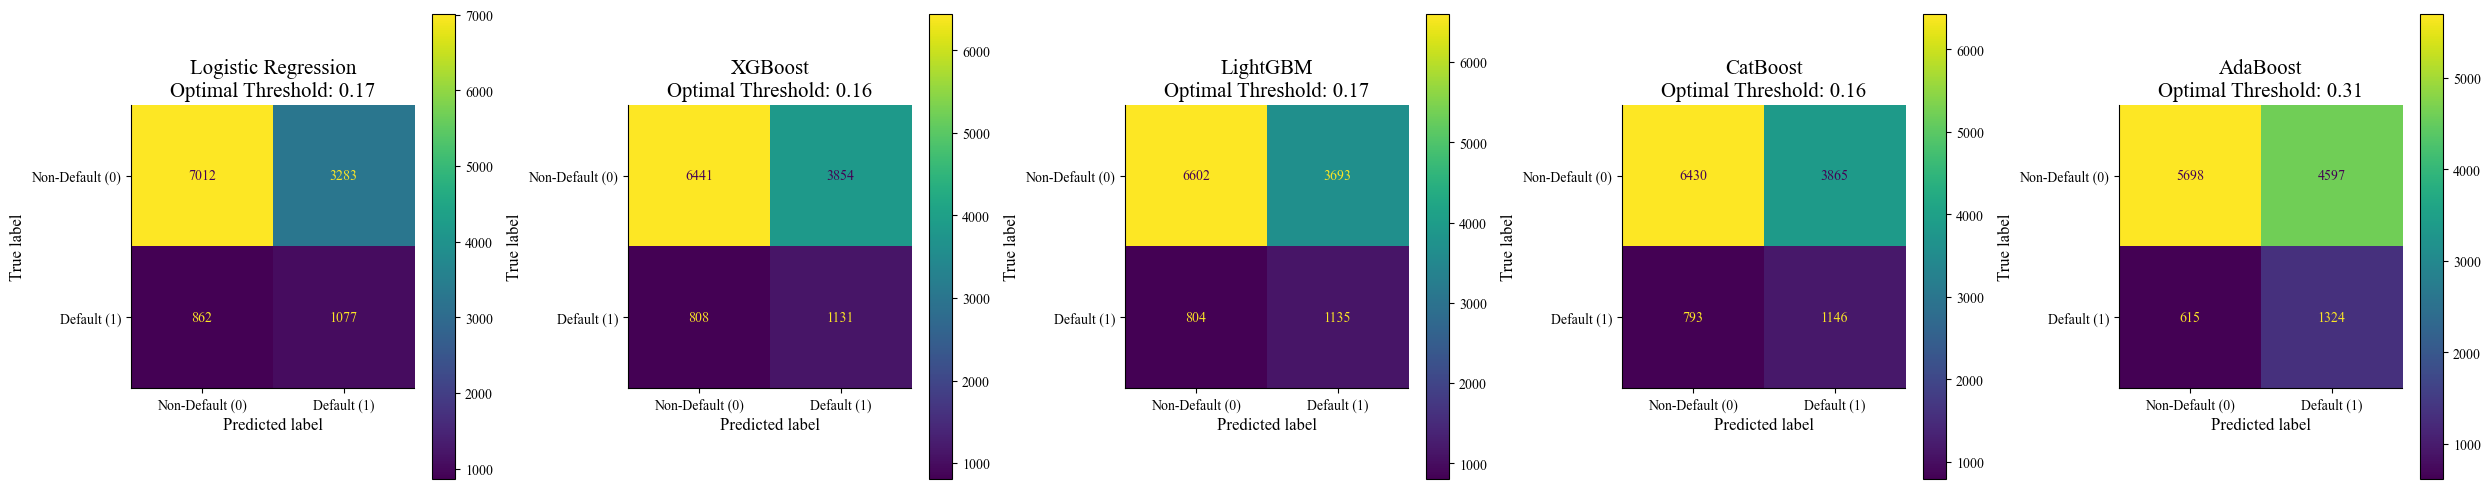

In [15]:
# Plotting confusion matrices for X_woe_automatic
evaluate_models_and_plot_confusion_matrices(X_woe_automatic, y)

Since detecting defaults is your main objective (with a default being represented as 1), the assessment of K-S and ROC curves results in the following determination:

- **The best-performing model** according to both K-S and AUC metrics is **Logistic Regression**. It has the highest K-S statistic (0.2817), showing its ability to effectively distinguish between defaulters (1) and non-defaulters (0).

- **Logistic Regression** achieves the highest AUC of 0.69, indicating a favorable trade-off between true positive and false positive rates at different thresholds. Identifying defaults depends crucially on having a higher true positive rate (TPR) because it means more defaults will be correctly identified.

- LightGBM and CatBoost have similar performance with AUCs of 0.68, suggesting they are effective models for identifying defaults. Yet, their Kolmogorov-Smirnov values are not as high as Logistic Regression's, indicating they are slightly less proficient in differentiating between the two categories.

XGBoost and AdaBoost show the poorest results in both K-S and AUC, which makes them less suitable for your particular goal of detecting defaults.

**In conclusion**

Logistic Regression is the model of choice for identifying defaults because of its excellent capacity to detect defaults and reduce false positives. To improve model performance even more, you may want to try adjusting hyperparameters or testing out ensemble techniques that merge several models. Nevertheless, according to the current assessment, Logistic Regression is recommended as the top choice for this project. Moreover, WoE modification ommits information that is necessary for predictions. Consequently, we will use Logistic Regression based on X sample. **In terms of ML we do not pay attention to variable significance, we may ommit insignificant values if they do lead to model overfit. The model is not overfitted (you will see it later on). Therefore, we do not need to apply feature selection**

# Final model 

**Data Splitting and Model Training**
   - **Logistic Regression Model**: 
     The code uses a logistic regression model to predict the probability of default (PD) for new clients. Logistic regression is appropriate here since the target variable is binary (default or no default).
   - **Cross-Validation**: 
     5-fold cross-validation is applied to evaluate the model's performance in predicting PD on the training data. Using AUC (Area Under the ROC Curve) as the metric helps ensure that the model can effectively distinguish between defaulters and non-defaulters. This step mitigates overfitting and evaluates model robustness.
   - **Model Fitting**: 
     After validating, the model is fitted to the entire training set, and it then predicts the default probabilities for the test set.

In [19]:
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Logistic Regression model
model = LogisticRegression(random_state=random_state, max_iter=1000)

# Cross-validation (using 5-fold CV)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

# Output cross-validation scores for evaluation
print(f'Cross-Validation AUC Scores: {cv_scores}')
print(f'Mean AUC Score: {cv_scores.mean()}')

# Fit the model on the entire training data after cross-validation
model.fit(X_train, y_train)

# Predict probabilities on the test set
default_probabilities = model.predict_proba(X_test)[:, 1]

# Evaluate the model using AUC on the test set
auc_score = roc_auc_score(y_test, default_probabilities)
print(f'Test AUC Score: {auc_score}')

Cross-Validation AUC Scores: [0.6842209  0.69684961 0.69207231 0.68660976 0.68529636]
Mean AUC Score: 0.6890097893283122
Test AUC Score: 0.6899006387384433


# Decision Making Strategy

The strategy behind the code follows a step-by-step approach to assess credit risk and determine optimal interest rates for individual clients based on their probability of default (PD). The key decisions revolve around risk management and profitability, particularly in the context of offering loans. Here's a breakdown of the strategy:

**Interest Rate Calculation**

At the core of the decision-making strategy is the calculation of an appropriate interest rate, denoted as \( r_n \). To achieve this, a mathematical function is defined to evaluate the relationship between the interest rate, loan term, PD, and funded amount. The function incorporates key financial principles, such as the calculation of annuity factors and future values. Importantly, it includes mechanisms to penalize solutions that yield non-positive profit and loss (PNL) outcomes, ensuring that only financially viable options are considered.

A notable aspect of this calculation is the improved initial guess for \( r_n \) based on the predicted probability of default. This adaptive approach not only enhances the accuracy of the solution but also accelerates the convergence of the computational process. Each client’s specific characteristics are considered, enabling a tailored assessment that reflects their individual risk profiles.

**Profit and Loss Evaluation**

Once the interest rates are determined, the next step involves evaluating the projected profit and loss for each client loan. This evaluation is encapsulated in a dedicated function that calculates PNL by examining three critical components:

1. **Income from Loan Payments:** This term assesses the revenue generated from clients’ loan repayments, taking into account the calculated interest rate.
  
2. **Loss Due to Default Risk:** This component evaluates potential losses associated with clients who may default, incorporating both the probability of default and the potential loss given default (LGD). 

3. **Compounded Value of the Loan at Risk-Free Rate:** This term calculates the future value of the loan at a risk-free interest rate, providing a benchmark against which the loan's performance can be measured.

The aggregate PNL is derived from these components, yielding a comprehensive view of the financial implications of each loan. After calculating the PNL for each client, the results are consolidated into a structured format.

In [30]:
# Ensure the order of the columns is the same
df_to_pred = df_to_pred[X_train.columns]

In [32]:
# Predict probabilities on the new set
default_probabilities = model.predict_proba(df_to_pred)[:, 1]

Text(0, 0.5, 'Number of clients')

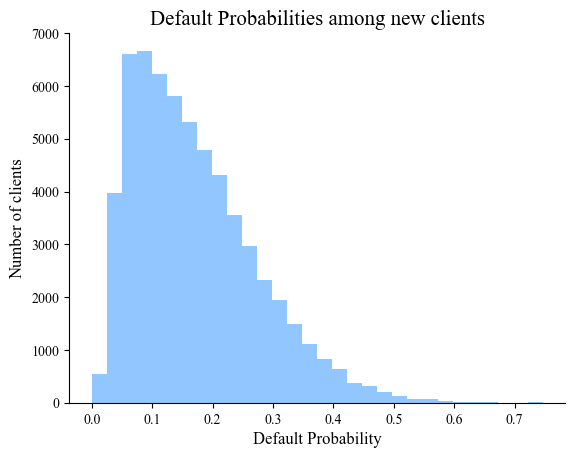

In [34]:
plt.hist(default_probabilities, bins=30)
plt.title("Default Probabilities among new clients")
plt.xlabel("Default Probability")
plt.ylabel("Number of clients")

In [51]:
# Step 1: Load the CSV file containing the client data
data = pd.read_csv('new_clients_for_scoring.csv')
default_probabilities = model.predict_proba(df_to_pred)[:, 1]
data['PD'] = default_probabilities

# Step 2: Define the function to solve for r_n
def func(r_n, n, PD, S):
    # Use monthly rate equivalent for 8% annual rate
    monthly_rate = (1 + 0.08) ** (1/12) - 1
    C = (1 + monthly_rate) ** n / (((1 + monthly_rate) ** n - 1) / monthly_rate * (1 - 0.6 * PD))
    
    # Calculate the annuity factor and future value
    annuity_factor = r_n * (1 + r_n) ** n / ((1 + r_n) ** n - 1)
    future_value = C * (1 + r_n) ** n
    
    # Define the equation: r_n * (1 + r_n)^n = C * (1 + r_n)^n - C
    equation = r_n * (1 + r_n) ** n - future_value + C
    
    # Ensure that we return a high value if PNL is non-positive
    if annuity_factor * S < 0:
        return 1e10  # Large penalty to avoid this solution

    return equation

# Step 3: Create a list to store the solutions (r_n values)
solutions = []

# Step 4: Iterate over each row (each client) and solve for r_n
for index, row in data.iterrows():
    n = row['term']  # Loan term (from the 'term' column)
    PD = row['PD']  # Probability of Default (from the 'PD' column)
    S = row['funded_amnt']  # Funded amount (loan principal)
    
    # Improved initial guess for r_n based on PD
    initial_guess = 0.1 + (0.4 * (1 - PD))  # Adjust initial guess based on PD
    
    # Solve for r_n using fsolve
    solution = fsolve(func, initial_guess, args=(n, PD, S))
    
    # Append the solution to the list
    solutions.append(solution[0])

# Step 5: Add the solutions (r_n) to the dataframe
data['r_n'] = solutions
data['r_n'] = data['r_n'] + 1e-9

# Step 6: Define the function to calculate PNL
def calculate_pnl(r_n, PD, n, S):
    # Use monthly rate equivalent for 8% annual rate
    monthly_rate = (1 + 0.08) ** (1/12) - 1
    
    # First term: income from loan payments
    term1 = (r_n * (1 + r_n) ** n) / ((1 + r_n) ** n - 1) * S * ((1 + monthly_rate) ** n - 1) / monthly_rate
    
    # Second term: loss due to default risk (PD and LGD)
    term2 = 0.6 * PD * (r_n * (1 + r_n) ** n) / ((1 + r_n) ** n - 1) * S * ((1 + monthly_rate) ** n - 1) / monthly_rate
    
    # Third term: compounded value of loan at risk-free rate
    term3 = (1 + monthly_rate) ** n * S
    
    # Calculate PNL
    pnl = term1 - term2 - term3
    
    return pnl

data['rate_offered'] = ((1 + data['r_n'])**12 - 1) * 100

# Step 7: Create a list to store the calculated PNL values
pnl_values = []

# Step 8: Iterate over each row (each client) and calculate PNL
for index, row in data.iterrows():
    r_n = row['r_n']  # Loan rate (calculated earlier)
    PD = row['PD']    # Probability of default
    n = row['term']   # Loan term (in months)
    S = row['funded_amnt']  # Funded amount (loan principal)
    
    # Calculate PNL for this client
    pnl = calculate_pnl(r_n, PD, n, S)
    
    # Append the PNL value to the list
    pnl_values.append(pnl)

# Step 9: Add the PNL values to the dataframe
data['PNL'] = pnl_values
data.drop('r_n', axis=1, inplace=True)


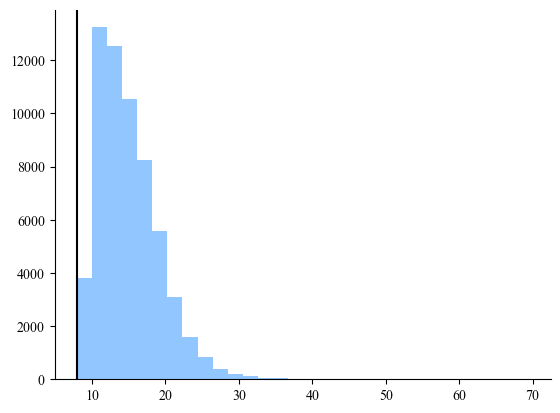

In [55]:
plt.hist(data[['rate_offered']], bins=30)
plt.axvline(8, color='k')

In [68]:
data[['rate_offered']].describe()

,rate_offered
count,60333.000000
mean,14.987348
std,4.127375
min,8.000001
25%,11.797138
50%,14.237771
75%,17.385342
max,69.373022


In [74]:
data[['PNL']].describe()

,PNL
count,60333.000000
mean,0.000438
std,0.000324
min,0.000017
25%,0.000180
50%,0.000349
75%,0.000612
max,0.001460


In [76]:
data.to_csv('2_clients.csv', index=False)

# Average profit on train

In [83]:
default_probabilities = model.predict_proba(X)[:, 1]
data_train = pd.read_csv('data.csv')
data_train['PD'] = default_probabilities

# Step 3: Create a list to store the solutions (r_n values)
solutions = []

# Step 4: Iterate over each row (each client) and solve for r_n
for index, row in data_train.iterrows():
    n = row['term']  # Loan term (from the 'term' column)
    PD = row['PD']  # Probability of Default (from the 'PD' column)
    S = row['funded_amnt']  # Funded amount (loan principal)
    
    # Improved initial guess for r_n based on PD
    initial_guess = 0.1 + (0.4 * (1 - PD))  # Adjust initial guess based on PD
    
    # Solve for r_n using fsolve
    solution = fsolve(func, initial_guess, args=(n, PD, S))
    
    # Append the solution to the list
    solutions.append(solution[0])

# Step 5: Add the solutions (r_n) to the dataframe
data_train['r_n'] = solutions
data_train['r_n'] = data_train['r_n'] + 1e-9  # Avoid division by zero in later steps

# Step 7: Create a list to store the calculated PNL values
pnl_values = []

# Step 8: Iterate over each row (each client) and calculate PNL
for index, row in data_train.iterrows():
    r_n = row['r_n']  # Loan rate (calculated earlier)
    PD = row['PD']    # Probability of default
    n = row['term']   # Loan term (in months)
    S = row['funded_amnt']  # Funded amount (loan principal)
    
    # Calculate PNL for this client
    pnl = calculate_pnl(r_n, PD, n, S)
    
    # Append the PNL value to the list
    pnl_values.append(pnl)

# Step 9: Add the PNL values to the dataframe
data_train['PNL'] = pnl_values

In [84]:
(((data_train['funded_amnt']*(1+data_train['r_n'])**data_train['term'])*abs(1-data_train['def'])).sum() - (data_train['funded_amnt'] * data_train['def']).sum())/data_train.shape[0]

17298.72189947075